In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

### Loading in datasets

In [157]:
usage_by_state = pd.read_csv('CSV/usage_by_state.csv')
usage_by_state.set_index('state',inplace=True)

worker_impact = pd.read_csv('CSV/worker_impact.csv')
worker_impact.set_index('tech_usage_worker_impact', inplace=True)

Looking at technology usage by state

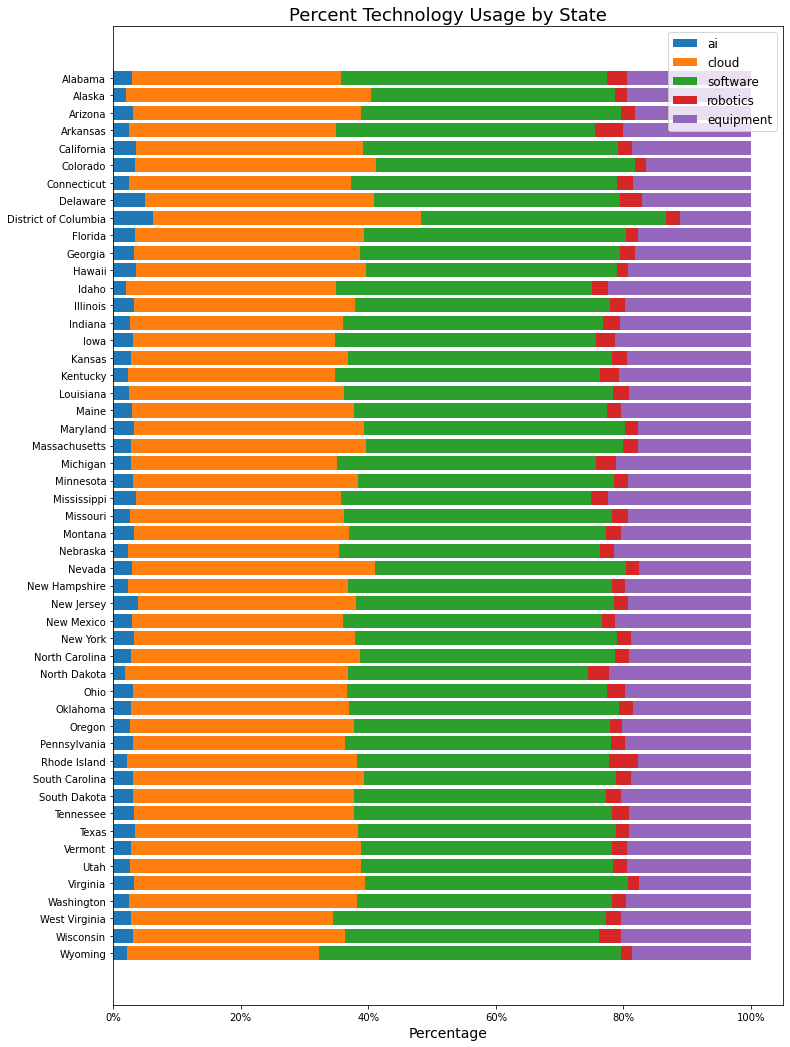

In [142]:
plt.rcParams['figure.figsize'] = [12,18]

usage_100 = usage_by_state.div(usage_by_state.sum(axis=1), axis=0)

bottom = []

for i in usage_100.columns:
    b = list(usage_100.loc[:, usage_100.columns[0]: i].sum(axis=1))
    bottom.append(b)

fig, ax = plt.subplots()

for i, j in enumerate(usage_100.columns):
    if i == 0:
        plt.barh(usage_100.index, usage_100[j])
    else:
        plt.barh(usage_100.index, usage_100[j], left= bottom[i-1])

#formatting
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
ax.invert_yaxis()
ax.set_xlabel('Percentage', fontsize=14)
plt.legend(labels=usage_100.columns, fontsize='large')
plt.title('Percent Technology Usage by State', fontsize=18)
plt.show();


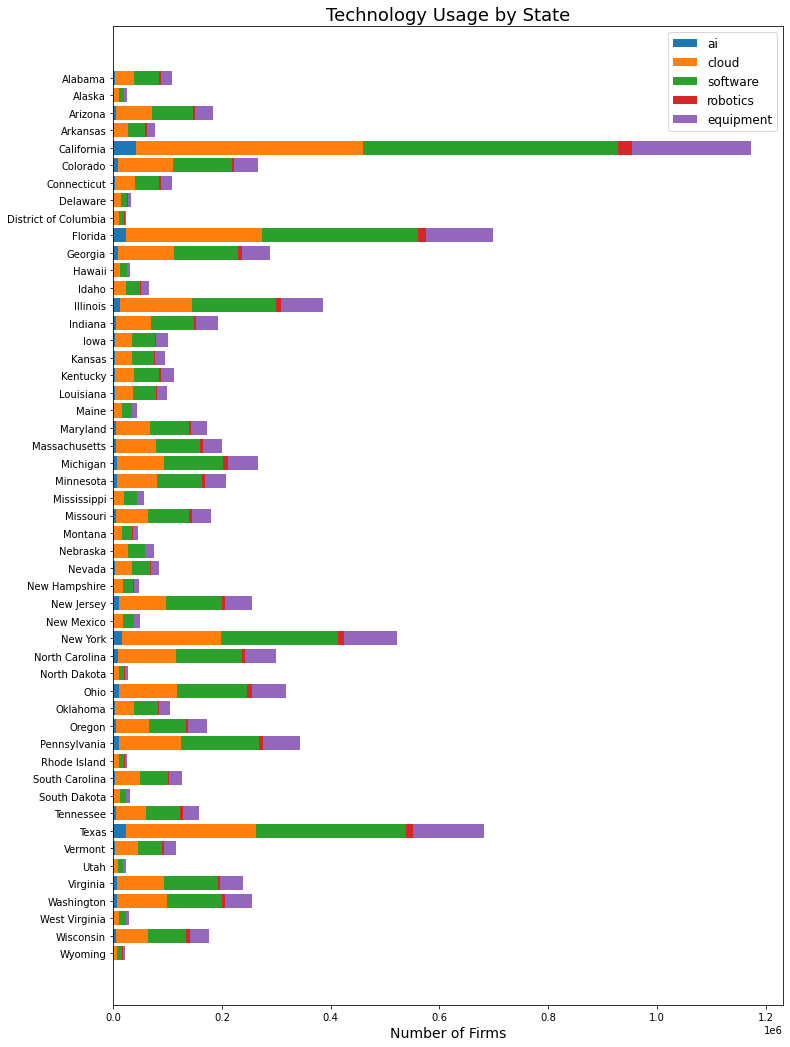

In [146]:
plt.rcParams['figure.figsize'] = [12,18]
bottom = []

for i in usage_by_state.columns:
    b = list(usage_by_state.loc[:, usage_by_state.columns[0]: i].sum(axis=1))
    bottom.append(b)

fig, ax = plt.subplots()

for i, j in enumerate(usage_by_state.columns):
    if i == 0:
        plt.barh(usage_by_state.index, usage_by_state[j])
    else:
        plt.barh(usage_by_state.index, usage_by_state[j], left= bottom[i-1])

#formatting
ax.invert_yaxis()
ax.set_xlabel('Number of Firms', fontsize=14)
plt.legend(labels=usage_by_state.columns, fontsize='large')
plt.title('Technology Usage by State', fontsize=18)
plt.show();

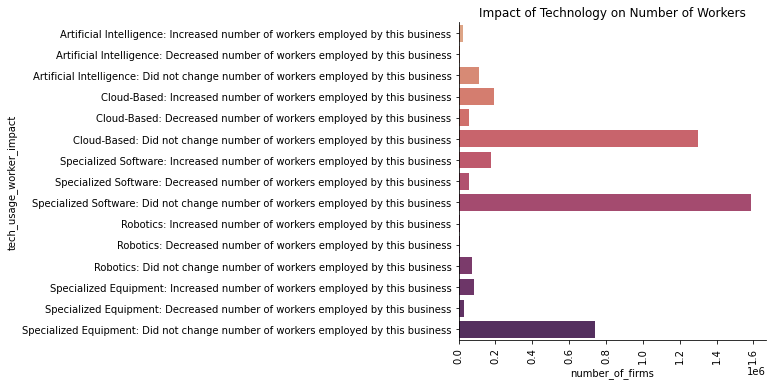

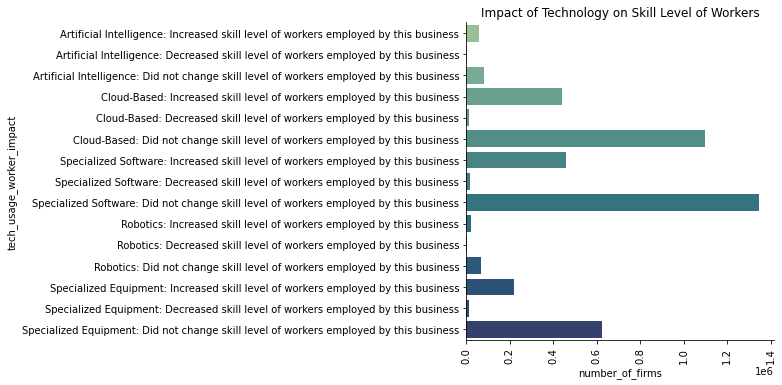

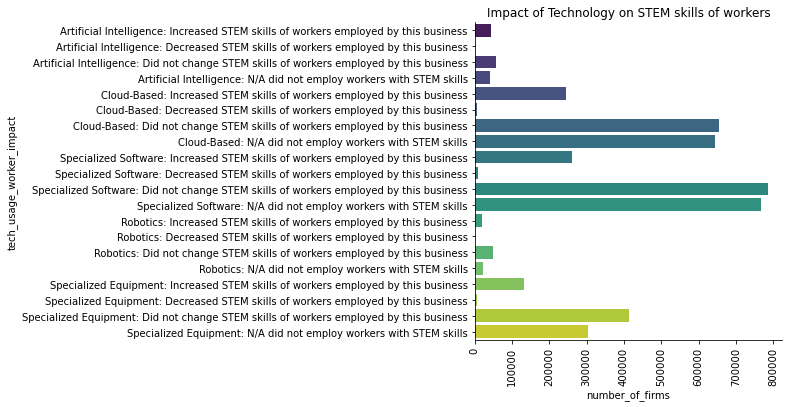

In [192]:
all_industries = worker_impact[worker_impact['naics2017'] == '00']
all_industries = all_industries[[
    'impactwf_u', 'number_of_firms', 'number_of_employees', 'annual_payroll'
    ]]

numb_workers = all_industries[all_industries.index.str.contains('number of workers')]
skill = all_industries[all_industries.index.str.contains('skill level')]
stem = all_industries[all_industries.index.str.contains('STEM')]

sns.catplot(
    y = numb_workers.index,
    x = 'number_of_firms',
    data = numb_workers,
    kind = 'bar',
    palette = 'flare'
    );
plt.title('Impact of Technology on Number of Workers')
plt.xticks(rotation=90);

sns.catplot(
    y = skill.index,
    x = 'number_of_firms',
    data = skill,
    kind = 'bar',
    palette = 'crest'
    );

plt.xticks(rotation=90);
plt.title('Impact of Technology on Skill Level of Workers')

sns.catplot(
    y = stem.index,
    x = 'number_of_firms',
    data = stem,
    kind = 'bar',
    palette = 'viridis'
    );

plt.xticks(rotation=90);
plt.title('Impact of Technology on STEM skills of workers');
